# Continuity of the tensor decomposition

We check that the four and five dimensional tensor decompositions, based appropriately enhanced Voronoi decomposition, have Lipschitz continuous coefficients.

In [362]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from LinearP import *
# Call c++ library
FileVDE_binary_dir = '/Users/mirebeau/bin/VoronoiDecompExport/FileVDE/Debug' 
import FileIO

In [363]:
# Extract the lower triangular part of a (symmetric) matrix, put in a vector
def Sym2V(a):
	m,n = a.shape[:2]
	if m!=n:
		raise ValueError("Sym2V error: matrix is not square")
	return np.array([a[i,j] for i in range(n) for j in range(i+1)])

def V2Sym(a):
	d = a.shape[0]
	m = int(np.floor(np.sqrt(2*d)))
	if d!=m*(m+1)//2:
		raise ValueError("V2Sym error: first dimension not of the form d(d+1)/2")
	def index(i,j):
		a,b=np.maximum(i,j),np.minimum(i,j)
		return a*(a+1)//2+b
	return np.array([ [a[index(i,j)] for i in range(m)] for j in range(m)])

def VoronoiDecomp(a):
	vdeIn ={'tensors':np.moveaxis(Sym2V(a),0,-1)}
	vdeOut = FileIO.WriteCallRead(vdeIn, "FileVDE", FileVDE_binary_dir)
	return np.moveaxis(vdeOut['weights'],-1,0),np.moveaxis(vdeOut['offsets'],[-1,-2],[0,1])

In [371]:
# Get the coefficient of a each offset
def GatherByOffset(Coefs,Offsets):
    TimeCoef = {};
    for (i,t) in enumerate(T):
        coefs = Coefs[:,i]
        offsets = Offsets[:,:,i]
        for (j,c) in enumerate(coefs):
            offset = tuple(offsets[:,j].astype(int))
            if offset in TimeCoef:
                TimeCoef[offset][0].append(t)
                TimeCoef[offset][1].append(c)
            else:
                TimeCoef[offset] = ([t],[c])
    return TimeCoef

## Dimension 5

In [390]:
dim=5

# Get two arbitrary SDP matrices
A = np.random.standard_normal( (dim,dim,2) )
M = dotP_AA(transP(A),A)

# Interpolate between them
T = np.linspace(0,1,500)
MT = np.empty((dim,dim,T.size))
for (i,t) in enumerate(T):
    MT[:,:,i] = (1-t)*M[:,:,0]+t*M[:,:,1]
    
# Decompose the tensors
Coefs,Offsets = VoronoiDecomp(MT)

In [391]:
M[:,:,0],M[:,:,1]

(array([[ 4.04114946, -4.41410167,  0.20811294,  0.36106723, -1.52299972],
        [-4.41410167,  5.83694712, -0.53914177,  1.28063079,  0.75068665],
        [ 0.20811294, -0.53914177,  3.01445778,  2.13397859, -0.50512571],
        [ 0.36106723,  1.28063079,  2.13397859, 10.54322241, -4.4575276 ],
        [-1.52299972,  0.75068665, -0.50512571, -4.4575276 ,  3.47177349]]),
 array([[ 2.06079979, -0.44110981,  0.12924066, -0.45732635, -1.89402964],
        [-0.44110981,  1.35484961,  1.03145244,  0.80852519,  1.05834032],
        [ 0.12924066,  1.03145244,  5.59086203, -2.76636772,  0.21818921],
        [-0.45732635,  0.80852519, -2.76636772,  4.82399548, -0.44456722],
        [-1.89402964,  1.05834032,  0.21818921, -0.44456722,  4.13315793]]))

In [392]:
TimeCoef = GatherByOffset(Coefs,Offsets)

# The offsets used in the decompositions
TimeCoef.keys()

dict_keys([(0, 0, 1, 1, -1), (1, -1, 0, -1, 0), (0, 0, 0, 1, 0), (0, 0, 1, 0, 0), (1, -2, 1, -1, 0), (0, 1, 0, 1, -1), (1, -1, 0, 0, 0), (0, 0, 1, 2, -1), (0, 0, 1, 1, 0), (1, -1, 0, 1, -1), (0, 1, 0, 2, -1), (0, 0, 0, 1, -1), (1, -2, 0, -2, 1), (0, 1, -1, 1, -1), (1, -2, 0, -1, 0), (0, 1, -1, 0, 0), (1, -1, 1, 1, -1), (0, 1, 0, 0, 0), (0, 1, 0, 1, 0), (1, -1, 0, 0, -1), (1, 0, 0, 1, -1), (0, 1, 1, 2, -1), (1, 0, 1, 1, -1), (0, 1, 1, 1, -1), (0, 1, 1, 1, 0), (0, 1, 1, 0, 0), (1, 0, 1, 0, -1), (0, 0, 1, -1, 0), (1, -1, 1, -1, 0), (1, 0, 1, -1, 0), (1, 0, 0, 0, 0), (0, 0, 1, -1, 1), (0, 0, 0, 0, 1), (1, 0, 0, 0, -1), (1, -1, 0, -1, -1), (0, 1, 1, 0, 1), (0, 0, 1, 0, -1), (1, -1, -1, 0, -1), (1, -1, -1, -1, -1), (1, -1, -1, 0, -2), (1, -1, 0, -1, -2)])

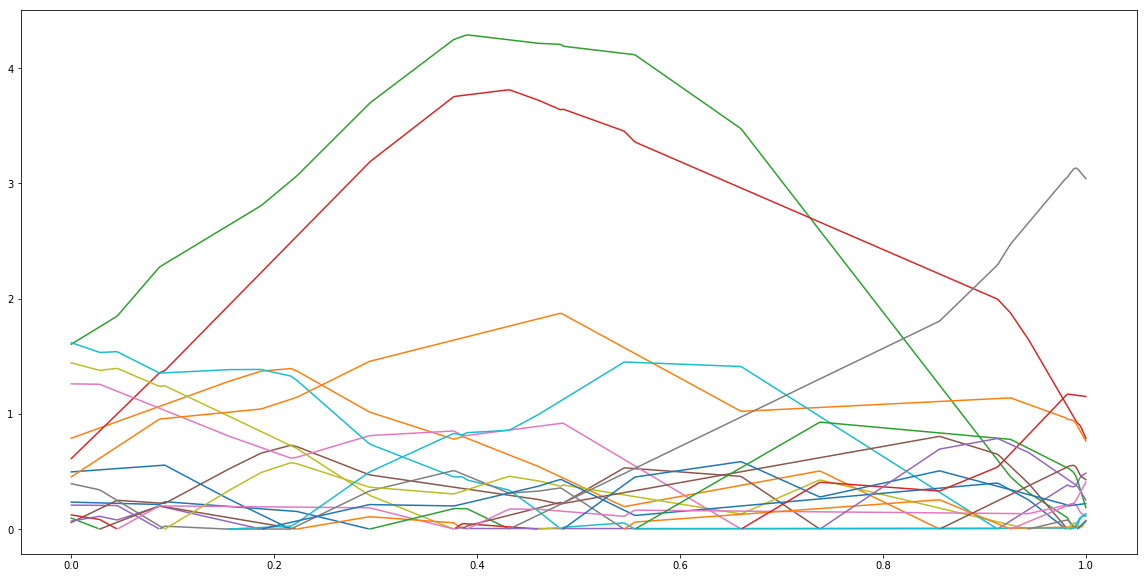

In [393]:
# Coefficients and non-negative and Lipschitz regular (Note: Lipschitz bound depends on the condition number)
plt.figure(figsize=(20,10))
for _,(time,coef) in TimeCoef.items():
    plt.plot(time,coef)

In [394]:
#Non-negative coefficients. And reproduce the matrix.
Rec = multP(Coefs,outerP(Offsets,Offsets)).sum(2)
print(np.max(np.abs(Rec-MT)))

8.881784197001252e-15
